Analiza serij

V tej projektni nalogi bom analizirala sto najpopularnejših televizijskih serij na spletni strani iMDb. Podatke sem zajela na imdb.com.

In [197]:
import pandas as pd
pd.set_option('display.max_rows', 20)
%matplotlib inline
serije = pd.read_csv('obdelani podatki/serije.csv',index_col='naslov')

In [198]:
serije

,avtorji,položaj na lestvici,povprečna dolžina epizode (v sekundah),splošna ocena,začetek predvajanja,število epizod,žanri
naslov,,,,,,,
One Piece,"['Steven Maeda', 'Matt Owens']",1,3600.0,8.5,2023,8,"['Action', 'Adventure', 'Comedy']"
Ahsoka,['Dave Filoni'],2,NaN,8.0,2023,8,"['Action', 'Adventure', 'Drama']"
The Wheel of Time,['Rafe Judkins'],3,3600.0,7.1,2021,21,"['Action', 'Adventure', 'Drama']"
One Piece: Wan pîsu,['Eiichirô Oda'],4,1440.0,8.9,1999,1083,"['Animation', 'Action', 'Adventure']"
Special Ops: Lioness,['Taylor Sheridan'],5,2520.0,7.7,2023,8,"['Action', 'Drama', 'Thriller']"
...,...,...,...,...,...,...,...
Skrivnostni otok,"['J.J. Abrams', 'Jeffrey Lieber', 'Damon Linde...",96,2640.0,8.3,2004,121,"['Adventure', 'Drama', 'Fantasy']"
Zdravnikova vest,['David Shore'],97,2640.0,8.7,2004,176,"['Drama', 'Mystery']"
And Just Like That...,"['Michael Patrick King', 'Darren Star']",98,2400.0,5.7,2021,22,"['Comedy', 'Drama', 'Romance']"


Najprej me zanima, kateri je trenutno najpopularnejši žanr. Da bom to ugotovila, bom preštela, kolikokrat se posamezen žanr pojavi.

In [199]:
sez_žanri1 = []
for niz in list(serije["žanri"]):
    sez_žanri1.append(niz.strip("[").strip("]"))
sez_žanri2 = ",".join(sez_žanri1)

In [200]:
sez_žanri3 = []
for niz in sez_žanri2.split(","):
    žanr = niz.strip("'").strip(" ").strip("'")
    sez_žanri3.append(žanr)

In [201]:
def preštej_žanr(sez):
    slovar_žanrov1 = {}
    for žanr in sez:
        if žanr not in slovar_žanrov1:
            slovar_žanrov1[žanr] = 1
        else:
            slovar_žanrov1[žanr] += 1
    return slovar_žanrov1

In [202]:
slovar_žanrov2 = preštej_žanr(sez_žanri3)

In [203]:
seznam_slovarjev = []
for žanr in slovar_žanrov2:
    seznam_slovarjev.append({"žanr" : žanr, "število" : slovar_žanrov2[žanr]})

In [204]:
prešteti_žanri = pd.DataFrame(seznam_slovarjev)
prešteti_žanri.to_csv('prešteti_žanri.csv', index = False, header = True)
prešteti_žanri = pd.read_csv('prešteti_žanri.csv', index_col='žanr')

In [205]:
prešteti_žanri

,število
žanr,
Action,26
Adventure,22
Comedy,28
Drama,73
Animation,7
Thriller,9
Crime,29
Western,2
Sci-Fi,8


<Axes: xlabel='število', ylabel='žanr'>

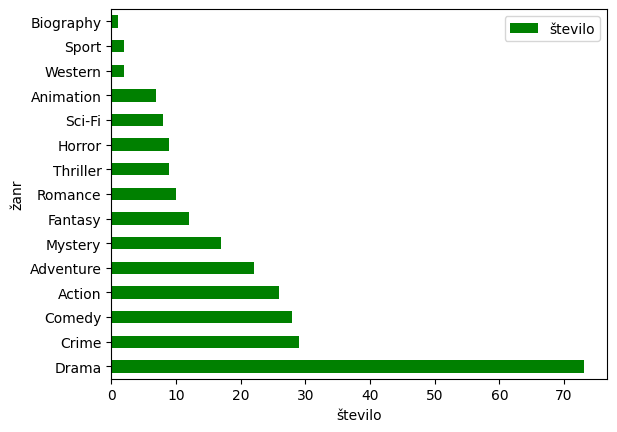

In [206]:
prešteti_žanri.sort_values(by='število', ascending=False).plot.barh(xlabel = 'število', color='green')

Lahko vidimo, da ima oznako drame večina serij. Prav tako so popularne komedije, akcijske, kriminalne in pustolovske serije. Na drugi strani med manj popularne žanre sodijo western, šport in biografija. Kar me preseneča je, da na lestvici najpopularnejših televizijskih serij ni veliko romantičnih serij. Teh je le desetina.

Zdaj me zanima, ali so trenutno bolj popularne novejše televizijske serije ali pa morda starejše. Kot novejše serije bom zajela vse, ki so se začele predvajati v zadnjih 5 letih. Prav tako želim izvedeti, katera je najstarejša serija na tem seznamu. 

In [207]:
nove_serije = serije[serije["začetek predvajanja"] >= 2018]
stare_serije = serije[serije["začetek predvajanja"] < 2018]

<Axes: xlabel='položaj na lestvici', ylabel='začetek predvajanja'>

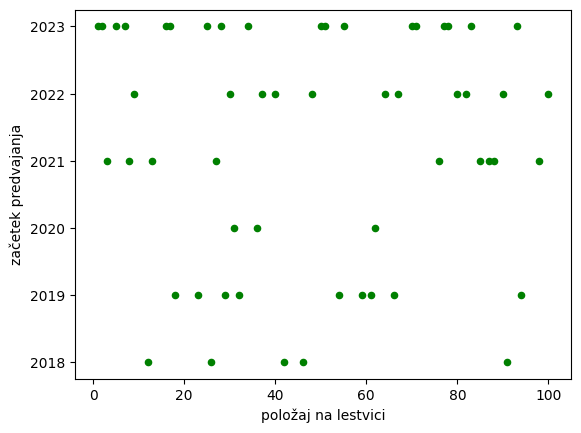

In [208]:
nove_serije.plot.scatter(x = 'položaj na lestvici', y = 'začetek predvajanja', color = 'green')

<Axes: xlabel='položaj na lestvici', ylabel='začetek predvajanja'>

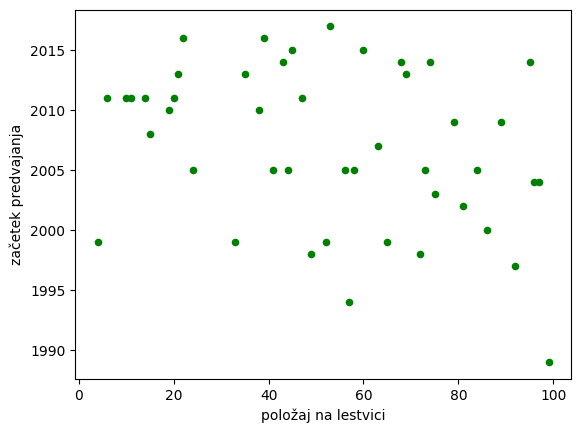

In [209]:
stare_serije.plot.scatter(x = 'položaj na lestvici', y = 'začetek predvajanja', color = 'green')

Iz teh dveh prikazov lahko vidimo, da so novejše serije nekako enakomerno razporejene po celotni lestvici. Pri starejših serijah pa lahko opazimo, da starejše kot so, bolj se začnejo pomikati v spodnjo polovico lestvice. Tako sem tudi pričakovala. Najbolj me je presenetilo dejstvo, da je ena izmed serij, posnetih pred letom 2000, pri samem vrhu lestvice. Preden pa izvem kaj več o njej, bom poiskala najstarejšo serijo na lestvici.

In [210]:
stare_serije['začetek predvajanja'].sort_values()

naslov
Seinfeld              1989
Prijatelji            1994
Umori na podezelju    1997
Oh, ta sedemdeseta    1998
Seks v mestu          1998
                      ... 
Better Call Saul      2015
Unforgotten           2015
Billions              2016
Stranger Things       2016
Mladi Sheldon         2017
Name: začetek predvajanja, Length: 45, dtype: int64

Najstarejša serija na lestvici z naslovom Seinfeld je iz leta 1989. Zdaj pa si poglejmo, katera izmed starejših serij je pristala tik pod vrhom lestvice.

In [211]:
stare_serije['položaj na lestvici'].sort_values()

naslov
One Piece: Wan pîsu      4
Nepremagljivi dvojec     6
Top Boy                 10
Igra prestolov          11
Ameriska grozljivka     14
                        ..
Umori na podezelju      92
Fargo                   95
Skrivnostni otok        96
Zdravnikova vest        97
Seinfeld                99
Name: položaj na lestvici, Length: 45, dtype: int64

In [212]:
stare_serije[stare_serije["položaj na lestvici"] < 10]

,avtorji,položaj na lestvici,povprečna dolžina epizode (v sekundah),splošna ocena,začetek predvajanja,število epizod,žanri
naslov,,,,,,,
One Piece: Wan pîsu,['Eiichirô Oda'],4,1440.0,8.9,1999,1083,"['Animation', 'Action', 'Adventure']"
Nepremagljivi dvojec,['Aaron Korsh'],6,2640.0,8.4,2011,134,"['Comedy', 'Drama']"


Izmed starejših serij se v deseterici najpopularnejših televizijskih serij nahajata dve. Najbolj me je presenetila serija One Piece: Wan pisu, saj je bila prvič predvajana že leta 1999, kljub temu pa je na lestvici pristala na četrtem mestu. Preseneča me tudi dejstvo, da ima kar 1083 epizod. Zdaj me zanima, če je tudi po številu epizod pri vrhu, tako da bom v nadaljevanju izvedla analizo popularnosti serij glede na število epizod.

Najprej si poglejmo, katera serija ima največ epizod.

In [213]:
serije['število epizod'].sort_values(ascending =False)

naslov
One Piece: Wan pîsu                       1083
Zakon in red: Enota za posebne primere     538
Preiskovalci na delu: NCIS                 458
Talenti v belem                            421
Zlocinski um                               335
                                          ... 
The Lost Flowers of Alice Hart               7
Who Is Erin Carter?                          7
The Woman in the Wall                        6
Painkiller                                   6
Liebes Kind                                  6
Name: število epizod, Length: 100, dtype: int64

Tukaj lahko vidimo, da ima serija One Piece: Wan pisu na lestvici, ki jo analiziram največ epizod. Zanimivo je, da ima kar dvakrat več epizod od serije, ki je po številu epizod tik za njo. Zdaj želim videti še, če so bolj popularne serije z večjim ali manjšim številom epizod. Med serije z večjim številom epizod bom štela tiste, ki imajo več kot 50 epizod.

<Axes: xlabel='položaj na lestvici', ylabel='število epizod'>

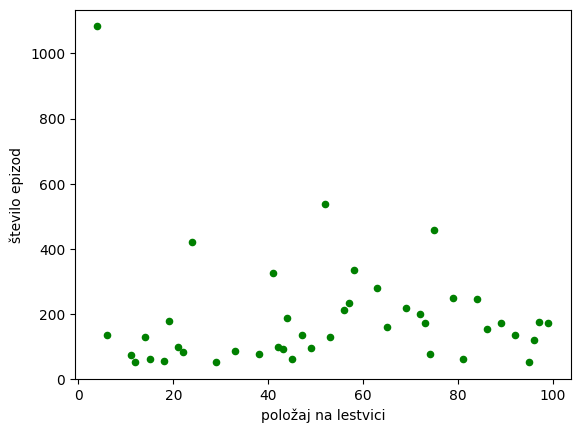

In [214]:
veliko_epizod = serije[serije['število epizod'] > 50]
veliko_epizod.plot.scatter(x = 'položaj na lestvici', y = 'število epizod', color = 'green')

Na grafu vidimo, da je nekaj več pikic v desni polovici, kar pomeni, da so serije z večjim številom epizod malenkost manj popularne kot tiste z manj epizodami, vendar število epizod na popularnost serije nima velikega učinka. Tudi iz tega grafa je lepo razvidno, da že prej omenjena serija One piece: Wan pisu izstopa. 

Že prej sem ugotovila, da se na lestvici, ki jo analiziram, nahajajo tudi serije, ki so se začele predvajati še v prejšnjem tisočletju. Zanima me, kako se je od takrat do danes spremenila povprečna dolžina epizod. To bom analizirala s pomočjo naslednjega grafa:

<Axes: xlabel='začetek predvajanja'>

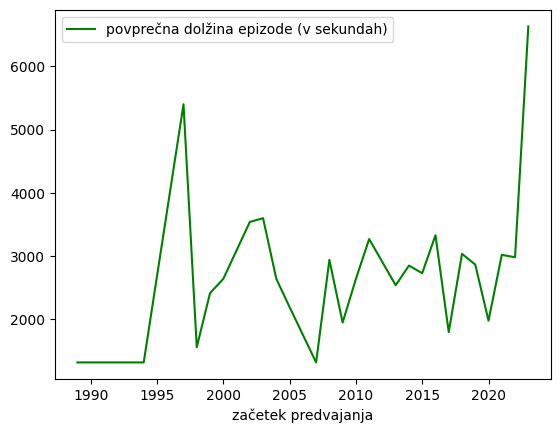

In [215]:
serije.groupby(by="začetek predvajanja").agg({"povprečna dolžina epizode (v sekundah)" : "mean"}).plot(color='green')

Iz grafa lahko razberemo, da se je povprečna dolžina epizod skozi leta nenehno spreminjala. Strme črte na grafu nakazujejo na to, da so bile te spremembe vedno zelo izrazite. Opazimo lahko, da so v zadnjih letih postale popularne serije z daljšo povprečno dolžino epizod. Zdaj me zanima še, kako je povprečna dolžina epizod povezana s številom epizod posamezne serije.

<Axes: xlabel='število epizod'>

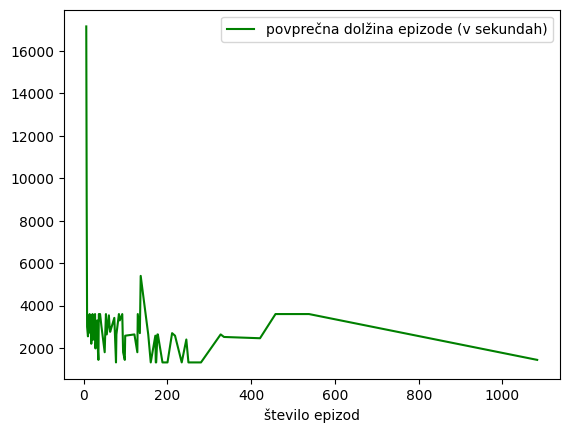

In [216]:
serije.groupby(by="število epizod").agg({"povprečna dolžina epizode (v sekundah)" : "mean"}).plot(color='green')

Izgleda, da imajo serije z manjšim številom epizod daljše epizode. Da bom graf lažje analizirala, ga bom razdelila na 2 območji, in sicer na območje, kjer se nahajajo serije z velikim številom epizod (več kot 50) in tistega, kjer so predstavljene serije z manjšim številom epizod (50 ali manj). 

<Axes: xlabel='število epizod'>

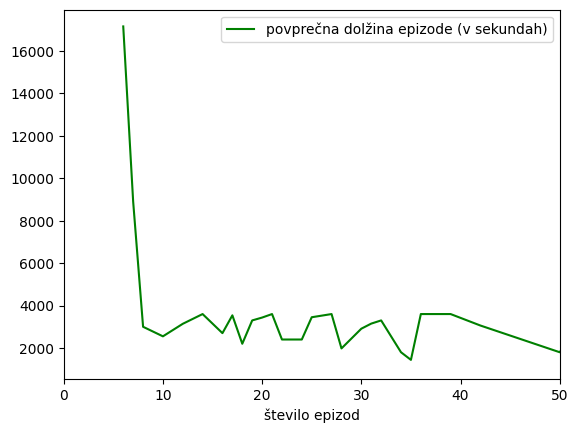

In [217]:
serije.groupby(by="število epizod").agg({"povprečna dolžina epizode (v sekundah)" : "mean"}).plot(color='green', xlim=(0, 50))

<Axes: xlabel='število epizod'>

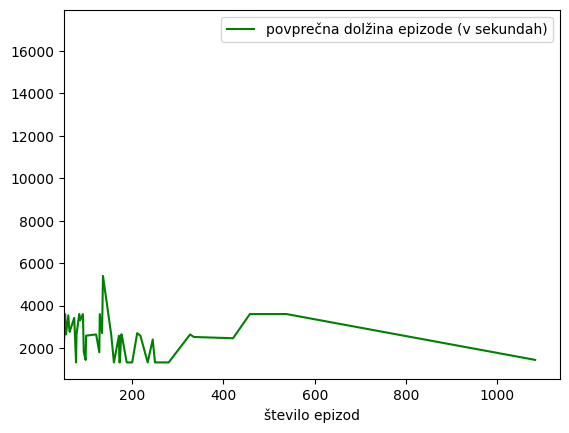

In [218]:
serije.groupby(by="število epizod").agg({"povprečna dolžina epizode (v sekundah)" : "mean"}).plot(color='green', xlim=(50))

Iz teh dveh grafov lahko sklepamo, da so serije s povprečno najdaljšimi epizodami tiste, ki imajo manj kot 10 epizod.

Poglejmo si še kakšna je splošna ocena serij, ki se nahajajo na lestvici najpopularnejših.

<Axes: xlabel='splošna ocena', ylabel='število'>

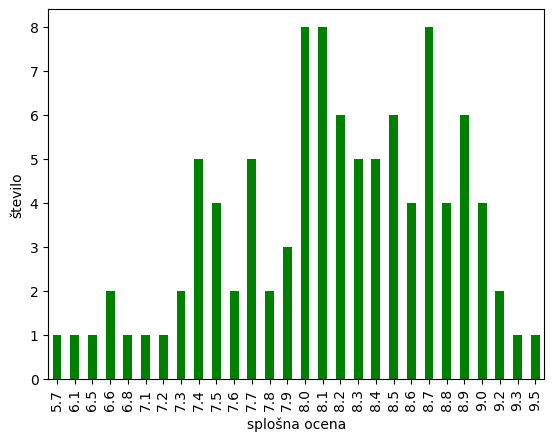

In [223]:
velikosti_skupin = serije.groupby(by=["splošna ocena"]).agg("size")
velikosti_skupin.plot.bar(ylabel="število", color='green')

Vidimo lahko, da so vse serije iz lestvice ocenjene s 5.7 ali več, večina pa je ocenjenih z 8.0 ali več. Torej lahko rečemo, da se na lestvici najpopularnejših serij nahajajo tiste serije, ki so tudi na splošno zelo dobro ocenjene.

Za konec pa bom analizirala še število serij glede na avtorja, saj me zanima, če se kateri od avtorjev na lestvici znajde večkrat.

In [221]:
sez_avtorji1 = []
for niz in list(serije["avtorji"]):
    sez_avtorji1.append(niz.strip("[").strip("]"))
sez_avtorji2 = ",".join(sez_avtorji1)

In [222]:
sez_avtorji3 = []
for niz in sez_avtorji2.split(","):
    avtor = niz.strip("'").strip(" ").strip("'")
    sez_avtorji3.append(avtor)

In [226]:
def preštej_avtorje(sez):
    slovar_avtorjev1 = {}
    for avtor in sez:
        if avtor not in slovar_avtorjev1:
            slovar_avtorjev1[avtor] = 1
        else:
            slovar_avtorjev1[avtor] += 1
    return slovar_avtorjev1

In [224]:
slovar_avtorjev2 = preštej_žanr(sez_avtorji3)

In [225]:
seznam_slovarjev2 = []
for avtor in slovar_avtorjev2:
    seznam_slovarjev2.append({"avtor" : avtor, "število" : slovar_avtorjev2[avtor]})

In [227]:
prešteti_avtorji = pd.DataFrame(seznam_slovarjev2)
prešteti_avtorji.to_csv('prešteti_avtorji.csv', index = False, header = True)
prešteti_avtorji = pd.read_csv('prešteti_avtorji.csv', index_col='avtor')

In [230]:
prešteti_avtorji.sort_values(by='število', ascending=False)

,število
avtor,
NaN,6
Taylor Sheridan,3
Eric Kripke,3
Simon Kinberg,2
Vince Gilligan,2
...,...
David Chase,1
Lauren Schmidt Hissrich,1
Adam Price,1


Vidimo, da je nekaj avtorjev, ki so ustvarili več kot eno serijo, ki se nahaja na lestvici najpopularnejših serij. Taylor Sheridan in Eric Kripke sta sodelovala pri nastanku kar treh serij iz te lestvice. 

Zaključek

Pri analizi sem ugotovila, da imamo ljudje zelo različne okuse glede televizijskih serij. Na lestvici stotih najpopularnejših serij je namreč zastopanih veliko različnih žanrov, serije se močno razlikujejo glede na število epizod in povprečno trajanje epizode, lestvica pa je prav tako pestra glede na splošno oceno serij. Pred analiziranjem podatkov sem mislila, da bom odkrila tip serije, ki je nekako bolj nagnjen k uspehu, vendar temu ni bilo tako. 